https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego

In [1]:
import nltk
import random

In [2]:
from nltk.corpus import names

In [4]:
names.fileids()

[u'female.txt', u'male.txt']

In [5]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
%matplotlib inline

In [6]:
name_cfd = nltk.ConditionalFreqDist((fileid,name[-2:])for fileid in names.fileids() for name in names.words(fileid))

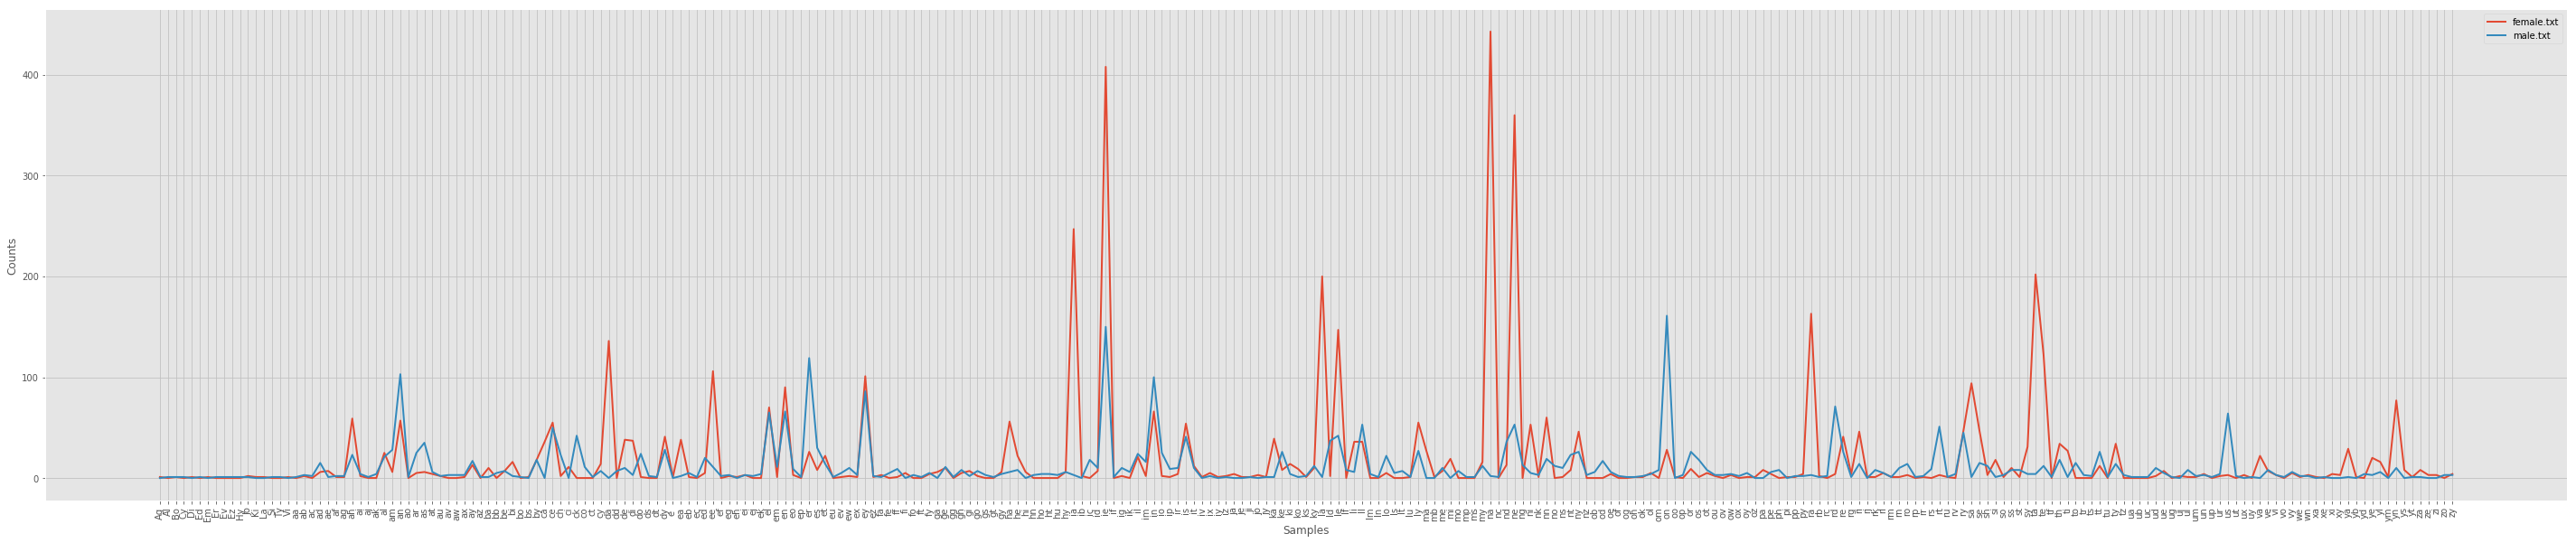

In [7]:
plt.figure(figsize=(50,10))
name_cfd.plot()

In [8]:
def name_features(name):
    return {"pair": name[-2:]}

In [42]:
name_features("Alex")

{'pair': 'ex'}

In [14]:
name_list = [(name, "male") for name in names.words("male.txt")] + [(name,"female")for name in names.words("female.txt")]

In [15]:
name_list[:10]

[(u'Aamir', 'male'),
 (u'Aaron', 'male'),
 (u'Abbey', 'male'),
 (u'Abbie', 'male'),
 (u'Abbot', 'male'),
 (u'Abbott', 'male'),
 (u'Abby', 'male'),
 (u'Abdel', 'male'),
 (u'Abdul', 'male'),
 (u'Abdulkarim', 'male')]

In [16]:
name_list[-10:]

[(u'Zonnya', 'female'),
 (u'Zora', 'female'),
 (u'Zorah', 'female'),
 (u'Zorana', 'female'),
 (u'Zorina', 'female'),
 (u'Zorine', 'female'),
 (u'Zsa Zsa', 'female'),
 (u'Zsazsa', 'female'),
 (u'Zulema', 'female'),
 (u'Zuzana', 'female')]

In [17]:
random.shuffle(name_list)

In [18]:
name_list[:10]

[(u'Pete', 'male'),
 (u'Susanetta', 'female'),
 (u'Karly', 'female'),
 (u'Lolande', 'female'),
 (u'Ferdy', 'male'),
 (u'Phyllida', 'female'),
 (u'Ambros', 'male'),
 (u'Adora', 'female'),
 (u'Dinny', 'female'),
 (u'Elizabeth', 'female')]

In [19]:
features = [(name_features(name), gender) for (name, gender) in name_list ]

In [20]:
features

[({'pair': u'te'}, 'male'),
 ({'pair': u'ta'}, 'female'),
 ({'pair': u'ly'}, 'female'),
 ({'pair': u'de'}, 'female'),
 ({'pair': u'dy'}, 'male'),
 ({'pair': u'da'}, 'female'),
 ({'pair': u'os'}, 'male'),
 ({'pair': u'ra'}, 'female'),
 ({'pair': u'ny'}, 'female'),
 ({'pair': u'th'}, 'female'),
 ({'pair': u'ri'}, 'female'),
 ({'pair': u'ha'}, 'female'),
 ({'pair': u'na'}, 'female'),
 ({'pair': u'ta'}, 'female'),
 ({'pair': u'do'}, 'male'),
 ({'pair': u'on'}, 'male'),
 ({'pair': u'la'}, 'female'),
 ({'pair': u'ta'}, 'female'),
 ({'pair': u'sa'}, 'female'),
 ({'pair': u'ey'}, 'female'),
 ({'pair': u'le'}, 'male'),
 ({'pair': u'er'}, 'male'),
 ({'pair': u'zi'}, 'female'),
 ({'pair': u'my'}, 'male'),
 ({'pair': u'ey'}, 'female'),
 ({'pair': u'ie'}, 'female'),
 ({'pair': u'la'}, 'female'),
 ({'pair': u'na'}, 'female'),
 ({'pair': u'se'}, 'female'),
 ({'pair': u'll'}, 'male'),
 ({'pair': u'ed'}, 'male'),
 ({'pair': u'sa'}, 'female'),
 ({'pair': u'ey'}, 'male'),
 ({'pair': u'ak'}, 'male'),
 ({'

In [22]:
len(features)/2

3972

In [23]:
training_set = features[:3972]
testing_set = features[3972:]

In [24]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [27]:
male_names = names.words("male.txt")

In [28]:
"Carmello" in male_names

False

In [29]:
classifier.classify(name_features("Carmello"))

'male'

In [30]:
"James" in male_names

True

In [31]:
"Jameshwart" in male_names

False

In [32]:
classifier.classify(name_features("Jameshwart"))

'male'

In [33]:
"Jufni" in male_names

False

In [34]:
"Jax" in male_names

False

In [35]:
classifier.classify(name_features("Jufni"))

'female'

In [36]:
classifier.classify(name_features("Jax"))

'male'

In [37]:
classifier.classify(name_features("Campbell"))

'male'

In [39]:
nltk.classify.accuracy(classifier, testing_set)

0.775679758308157

In [40]:
classifier.classify(name_features("Alex"))

'female'

In [41]:
nltk.classify.accuracy(classifier, testing_set)

0.775679758308157